importing important libraries and dependencies

In [37]:
import pandas as pd 
import nltk # natural language processing for tokenization, lemmatization, stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#sentiment analysis
from textblob import TextBlob # textblob for lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer # vader for lexicon-based sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer # to extract key words based on weights of frequency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier for machine learning based analysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans # k-means clustering for unsupervised learning

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

downloading necessary data kit

In [11]:
nltk.download('punkt') # used for tokenization
nltk.download('stopwords') # gives a bunch of stopwords
nltk.download('wordnet') # used for lemmatization
nltk.download('punkt_tab') # used for tokenization with non-english texts
nltk.download('vader_lexicon') # vader for lexicon-based analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

loading the data

In [5]:
df = pd.read_csv('data cleaning script and data/abyssiniaBank_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source
0,0,0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play Store
1,1,1,"hello, i’m facing a problem with the boa mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play Store
2,2,2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play Store
3,3,3,boa mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play Store
4,4,4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play Store


removing stop words, lemmatization and tokenization the "content"

In [7]:
def text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['final_review'] = df['review'].apply(text)

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review
0,0,0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play Store,working
1,1,1,"hello, i’m facing a problem with the boa mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play Store,hello facing problem boa mobile app every time...
2,2,2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play Store,exceptional
3,3,3,boa mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play Store,boa mobile good bank
4,4,4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play Store,worest app loading


Sentiment analysis using textblob

In [9]:
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.polarity > 0:
        return 'positive'
    elif analysis.polarity < 0:
        return 'negative'  
    return 'neutral'

df['textBlob_result'] = df['final_review'].apply(textblob_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result
0,0,0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play Store,working,neutral
1,1,1,"hello, i’m facing a problem with the boa mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play Store,hello facing problem boa mobile app every time...,positive
2,2,2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play Store,exceptional,positive
3,3,3,boa mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play Store,boa mobile good bank,positive
4,4,4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play Store,worest app loading,neutral


Sentiment analysis using vader

In [15]:
def vader_sentiment(text):
    analysis = SentimentIntensityAnalyzer().polarity_scores(text)
    if analysis['compound'] > 0:
        return 'positive'
    elif analysis['compound'] < 0:
        return 'negative'  
    return 'neutral'

df['vader_result'] = df['final_review'].apply(vader_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result,vader_result
0,0,0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play Store,working,neutral,neutral
1,1,1,"hello, i’m facing a problem with the boa mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play Store,hello facing problem boa mobile app every time...,positive,negative
2,2,2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play Store,exceptional,positive,neutral
3,3,3,boa mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play Store,boa mobile good bank,positive,positive
4,4,4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play Store,worest app loading,neutral,neutral


Sentimental analysis using Naive-Bayes model

In [16]:
# preparing the labeled data for training
def label(n):
    if n > 3:
        return 'positive'
    elif n < 3:
        return 'negative'
    return 'neutral'
df['label'] = df['rating'].apply(label)

vectorizing the review ( mapping each words to a numerical value that the Naive-bayes can work on)
TF(word) = (Number of times word appears in a document) / (Total words in the document)
IDF(word) = log(Total number of documents / Number of documents containing the word)
TF-IDF(word) = TF(word) * IDF(word)

In [17]:
vectorizer = TfidfVectorizer()
input_feature = vectorizer.fit_transform(df['final_review'])
label = df['label']


spliting the data as test and train data and training the NB model

In [22]:
input_train, input_test, label_train, label_test = train_test_split(input_feature, label, test_size=0.3, random_state=50)

naive_bayes = MultinomialNB()
naive_bayes.fit(input_train,label_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


checking the accuracy of the model

In [23]:
predicted = naive_bayes.predict(input_test)
print(f"Accuracy: {accuracy_score(label_test,predicted)}")

Accuracy: 0.7802547770700637


o.78 accuracy shows that if we judge the review based on the given star then the given star will tell about the reviews sentiment with > 78% accuracy

KeyWord Extraction using TF-IDF

In [26]:
vectorizer = TfidfVectorizer(max_features=100)
input = vectorizer.fit_transform(df['final_review'])
keyword = vectorizer.get_feature_names_out()
print(keyword)

['abyssinia' 'account' 'also' 'always' 'android' 'app' 'application'
 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'birr' 'boa' 'bug' 'ca'
 'cbe' 'could' 'crash' 'crashing' 'customer' 'day' 'developer' 'easy'
 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'experience' 'fast'
 'feature' 'fix' 'functional' 'get' 'good' 'great' 'issue' 'keep' 'know'
 'like' 'load' 'login' 'long' 'make' 'many' 'mobile' 'money' 'much' 'need'
 'never' 'new' 'nice' 'ok' 'one' 'open' 'option' 'otp' 'phone' 'please'
 'poor' 'previous' 'problem' 'properly' 'really' 'say' 'seen' 'service'
 'since' 'slow' 'sometimes' 'still' 'system' 'take' 'thank' 'time'
 'transaction' 'transfer' 'try' 'turn' 'update' 'updated' 'use' 'used'
 'useless' 'user' 'using' 'version' 'well' 'worest' 'work' 'working'
 'worse' 'worst' 'would' 'wow' 'በጣም' 'ነው']


Extracting the positive and negative keyword

In [28]:
positive = df[df['textBlob_result']=='positive']['final_review']
neutral = df[df['textBlob_result']=='neutral']['final_review']
negative = df[df['textBlob_result']=='negative']['final_review']

In [31]:
vectorizer = TfidfVectorizer(max_features=20)
positive_input = vectorizer.fit_transform(positive)
positive_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=20)
neutral_input = vectorizer.fit_transform(neutral)
neutral_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=20)
negative_input = vectorizer.fit_transform(negative)
negative_words = vectorizer.get_feature_names_out()

Grouping the extracted words

In [38]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=40)
kmeans.fit(negative_input)

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_keywords = [terms[ind] for ind in order_centroids[i, :50]]
    print(f"Cluster {i}: {', '.join(top_keywords)}")

Cluster 0: bank, time, app, transaction, update, please, worst, fix, ever, even, work, slow, mobile, use, ca, make, option, banking, developer, bad
Cluster 1: app, slow, use, please, bank, fix, ca, ever, update, transaction, mobile, banking, worst, work, time, option, make, even, developer, bad
Cluster 2: banking, worst, mobile, app, ever, use, work, make, even, time, please, bank, developer, ca, fix, option, transaction, update, slow, bad
Cluster 3: bad, app, work, transaction, make, fix, use, please, slow, time, update, worst, option, mobile, ever, even, ca, developer, bank, banking
Cluster 4: app, work, ever, slow, worst, developer, update, option, ca, please, even, make, fix, transaction, use, bank, time, mobile, banking, bad


In [32]:
print(positive_words)
print(neutral_words)
print(negative_words)

['app' 'bank' 'banking' 'best' 'better' 'boa' 'easy' 'good' 'great' 'like'
 'mobile' 'need' 'nice' 'one' 'please' 'time' 'update' 'use' 'version'
 'work']
['always' 'app' 'application' 'bank' 'banking' 'boa' 'crash' 'fix' 'keep'
 'like' 'mobile' 'open' 'please' 'update' 'use' 'worest' 'work' 'working'
 'በጣም' 'ነው']
['app' 'bad' 'bank' 'banking' 'ca' 'developer' 'even' 'ever' 'fix' 'make'
 'mobile' 'option' 'please' 'slow' 'time' 'transaction' 'update' 'use'
 'work' 'worst']


Visiualization

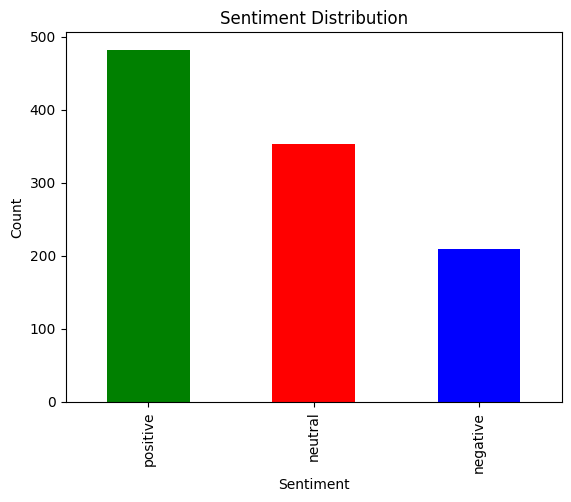

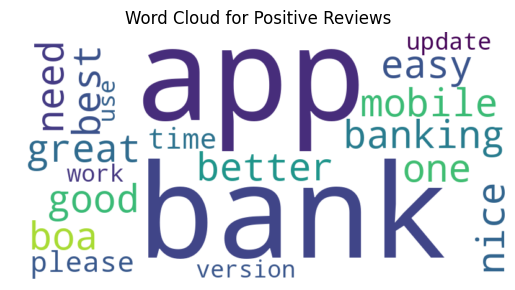

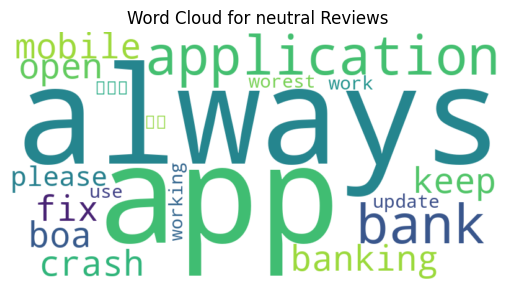

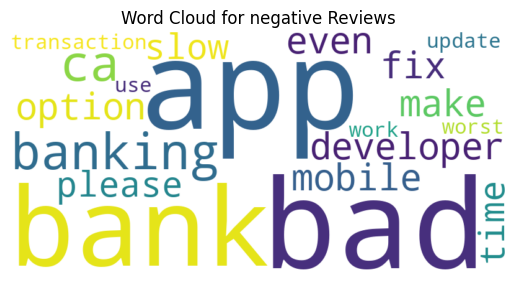

In [35]:
df['textBlob_result'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

positive_text = ' '.join(positive_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


neutral_text = ' '.join(neutral_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for neutral Reviews')
plt.show()


negative_text = ' '.join(negative_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for negative Reviews')
plt.show()

In [36]:
df.to_csv('final_data/abyssinia_analysis.csv')